In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [2]:
chunk_size = 100000  # Try 100k rows at a time
file_path = 'Crimes_-_2001_to_Present_20250427.csv'

In [3]:
selected_features = ['Year', 'Month', 'Day', 'DayOfWeek', 'Minute', 'Second', 'Latitude', 'Longitude']
target_column = 'Primary Type'

# Prepare empty list to store chunks
chunks_list = []

In [5]:
for chunk in pd.read_csv(file_path, chunksize=chunk_size):
    # Extract Date parts
    chunk['Month'] = pd.to_datetime(chunk['Date'], format='%m/%d/%Y %I:%M:%S %p', errors='coerce').dt.month
    chunk['Day'] = pd.to_datetime(chunk['Date'], format='%m/%d/%Y %I:%M:%S %p', errors='coerce').dt.day
    chunk['DayOfWeek'] = pd.to_datetime(chunk['Date'], format='%m/%d/%Y %I:%M:%S %p', errors='coerce').dt.dayofweek
    chunk['Minute'] = pd.to_datetime(chunk['Date'], format='%m/%d/%Y %I:%M:%S %p', errors='coerce').dt.minute
    chunk['Second'] = pd.to_datetime(chunk['Date'], format='%m/%d/%Y %I:%M:%S %p', errors='coerce').dt.second


In [6]:
    chunk = chunk.dropna(subset=selected_features + [target_column])

    # Keep only needed columns
    chunk = chunk[selected_features + [target_column]]

    # (Optional) Downsample if chunk is still too big
    chunk = chunk.sample(frac=0.2, random_state=42)  # take 20% from each chunk to limit memory

    # Add to list
    chunks_list.append(chunk)

    print(f"Processed a chunk of size {len(chunk)}")

Processed a chunk of size 280


In [7]:
data = pd.concat(chunks_list, ignore_index=True)

print(f"Total data collected: {data.shape}")

Total data collected: (280, 9)


In [8]:
X = data[selected_features]
y = data[target_column]

# Step 3: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [9]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 5: Evaluation
y_pred = model.predict(X_test)
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy Score: 0.20238095238095238

Classification Report:
                          precision    recall  f1-score   support

                ASSAULT       0.20      0.17      0.18         6
                BATTERY       0.32      0.32      0.32        19
               BURGLARY       0.33      0.33      0.33         3
        CRIMINAL DAMAGE       0.18      0.18      0.18        11
CRIMINAL SEXUAL ASSAULT       0.00      0.00      0.00         0
      CRIMINAL TRESPASS       0.00      0.00      0.00         3
     DECEPTIVE PRACTICE       0.00      0.00      0.00         7
    MOTOR VEHICLE THEFT       0.00      0.00      0.00         2
              NARCOTICS       0.00      0.00      0.00         3
          OTHER OFFENSE       0.25      0.14      0.18         7
               STALKING       0.00      0.00      0.00         0
                  THEFT       0.19      0.29      0.23        17
      WEAPONS VIOLATION       0.50      0.17      0.25         6

               accuracy    

C:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMet

Model saved as 'crime_prediction_model.pkl'


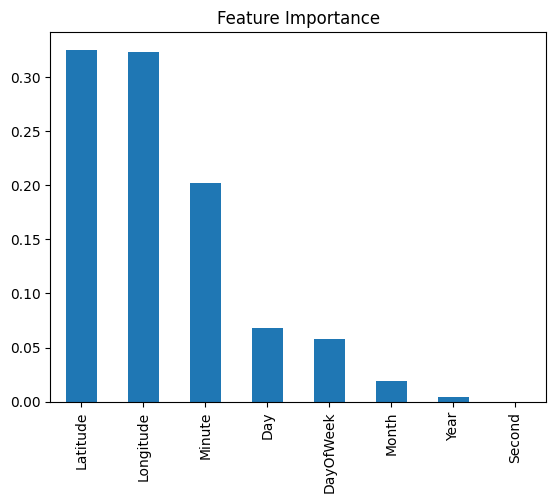

In [10]:
with open('crime_prediction_model.pkl', 'wb') as file:
    pickle.dump(model, file)

print("Model saved as 'crime_prediction_model.pkl'")

# Step 7: Feature Importance Plot
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.sort_values(ascending=False).plot(kind='bar')
plt.title('Feature Importance')
plt.show()